# Space Mission Analysis

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

#### Install Package with Country Codes. 
This will help us plot choropleth maps later on.

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from iso3166 import countries
from datetime import datetime, timedelta
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True)

In [4]:
# For offline use
cf.go_offline()

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Data Clean and Exploration


### Understanding the Data 

In [7]:
df_data.shape

(4324, 9)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3557,3557,3557,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue May 27, 1969 13:00 UTC",Cosmos-2I (63SM) | Cosmos 283,StatusRetired,NaN,Success
3743,3743,3743,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Sep 01, 1967 10:30 UTC",Voskhod | Zenit-2 n†­51,StatusRetired,NaN,Failure
2016,2016,2016,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Sun Feb 01, 1987 23:30 UTC",Tsyklon-2 | Cosmos 1818,StatusRetired,NaN,Success
819,819,819,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri May 23, 2008 15:20 UTC","Rokot/Briz KM | Cosmos 2437 to 2439, Youbilielnyi",StatusRetired,41.8,Success
2937,2937,2937,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Tue Apr 29, 1975 10:23 UTC",Molniya-M /Block ML | Molniya-1 n†­49,StatusRetired,NaN,Success


#### There are two junk columns (Unnamed) that dont make sense in the dataframe and need to be dropped. 

### Cleaning Data

#### Removing junk columns 

In [12]:
df_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)

#### Checking and removing duplicate rows

In [13]:
df_data[df_data.duplicated()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [14]:
df_data.iloc[793]

Organisation                                                   CASC
Location          Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
Date                                     Wed Nov 05, 2008 00:15 UTC
Detail                   Long March 2D | Shiyan-3 & Chuangxin-1(02)
Rocket_Status                                          StatusActive
Price                                                         29.75
Mission_Status                                              Success
Name: 793, dtype: object

In [15]:
df_data.iloc[792]

Organisation                                                   CASC
Location          Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
Date                                     Wed Nov 05, 2008 00:15 UTC
Detail                   Long March 2D | Shiyan-3 & Chuangxin-1(02)
Rocket_Status                                          StatusActive
Price                                                         29.75
Mission_Status                                              Success
Name: 792, dtype: object

In [16]:
df_data.drop_duplicates()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


#### Converting the price column from string to numeric. 

In [18]:
type(df_data["Price"].iloc[0])

str

In [19]:
df_data["Price"]

0        50.0
1       29.75
2         NaN
3        65.0
4       145.0
        ...  
4319      NaN
4320      NaN
4321      NaN
4322      NaN
4323      NaN
Name: Price, Length: 4324, dtype: object

####  This first requires us to get rid of the comma in the string and then convert it. 

In [20]:
df_data["Price"]=df_data["Price"].str.replace(",","")

In [21]:
df_data["Price"].iloc[1916]

'5000.0'

Happy to see "," missing at index 1916. 

####  Converting to numeric now.

In [22]:
df_data["Price"] = pd.to_numeric(df_data["Price"])

####  Checking the Date type 

In [23]:
df_data["Date"].iloc[1]

'Thu Aug 06, 2020 04:01 UTC'

####  Converting to datetime format 

In [24]:
df_data["Date"] = pd.to_datetime(df_data["Date"])

In [25]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


## Data Analysis


### Recorded Missions by Company

In [26]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


####  Checking how many unique organizations are there. 

In [27]:
df_data["Organisation"].nunique()

56

####  Creating a dataframe by grouping by Organisation and counting the number of times it occurs. 
####  This will give us how many launches are there by Organisations. 
####  Then we also sort it by descending order. 


In [28]:
og_missions = df_data.groupby("Organisation",as_index=False).count().sort_values("Mission_Status",ascending=False)
og_missions.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
40,RVSN USSR,1777,1777,1777,1777,2,1777
3,Arianespace,279,279,279,279,96,279
17,General Dynamics,251,251,251,251,0,251
7,CASC,251,251,251,251,158,251
35,NASA,203,203,203,203,149,203
52,VKS RF,201,201,201,201,33,201
49,US Air Force,161,161,161,161,26,161
48,ULA,140,140,140,140,98,140
6,Boeing,136,136,136,136,7,136
34,Martin Marietta,114,114,114,114,9,114


####  Looks like RVSN USSR tops the chart 1777 recorded missions. 

#### Below us a bar plot of the top organisations by recorded missions. 

In [29]:
og_missions.iplot(kind='bar',
                  x="Organisation",
                  y="Mission_Status",
                  xTitle="Organisation",
                  yTitle="Missions",
                  title="Number of Recorded Missions by Company"
)

### Number of Active versus Retired Rockets


In [30]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


####  Checking retired vs active rockets by using value_counts. 

In [31]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

####  Plotting a Pie chart to visualize it better. 

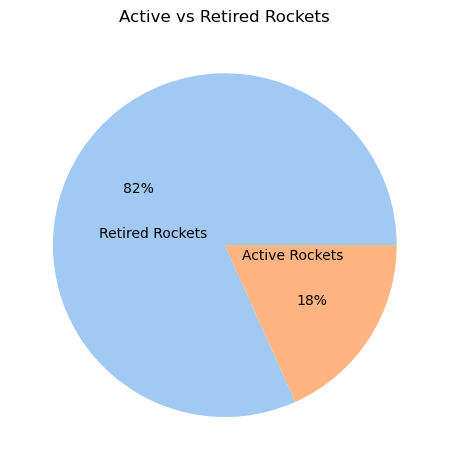

In [32]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(x=df_data["Rocket_Status"].value_counts(),
        labels=["Retired Rockets","Active Rockets"],
        colors=colors,
        autopct='%.0f%%',
        labeldistance = 0.12)
plt.title("Active vs Retired Rockets")
plt.tight_layout()

### Distribution of Mission Status

####  How many missions were successful?
####  How many missions failed?

In [33]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


####  Looking at the success spread of rocket launches by using value_counts on Mission_Status column. 

In [34]:
msn_succ = df_data["Mission_Status"].value_counts()
msn_succ.head()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [35]:

msn_succ.iplot(kind="bar",
               title="Mission Status",
               xTitle="Status",
               theme="solar",
               colorscale='rdylbu',
               yTitle="Number of Missions")

### There are far more successes than failures as seen above. The distribution is quite significant. 

### How Expensive are the Launches? 

In [36]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


#### Checking Data Type of price 

In [38]:
type(df_data["Price"].iloc[1])

numpy.float64

####  Creating a new dataframe with just organisation, Date and Price

In [39]:
og_prices = df_data[["Organisation","Date","Price"]]
og_prices.head()

,Organisation,Date,Price
0,SpaceX,2020-08-07 05:12:00+00:00,50.00
1,CASC,2020-08-06 04:01:00+00:00,29.75
2,SpaceX,2020-08-04 23:57:00+00:00,NaN
3,Roscosmos,2020-07-30 21:25:00+00:00,65.00
4,ULA,2020-07-30 11:50:00+00:00,145.00


In [40]:
og_prices.shape

(4324, 3)

#### Since we want to use an aggregation function on prices, it is better to drop rows that dont have any prices mentioned in order to visualize more accurately. 

In [41]:
og_prices.dropna(inplace=True)

In [42]:
og_prices.shape

(964, 3)

####  Using describe to see what the dataframe looks like now. 

In [43]:
og_prices["Price"].describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

### The maximum price spent on a mission was USD 5000 Million. 
### The average price is USD 153.8 Million 

#### Lets look at who spent 5000 Million USD for a single mission.

In [44]:
og_prices[og_prices["Price"]==5000]

,Organisation,Date,Price
1916,RVSN USSR,1988-11-15 03:00:00+00:00,"5,000.00"
2000,RVSN USSR,1987-05-15 17:30:00+00:00,"5,000.00"


## Russia! Did it twice. 

In [45]:
df_data[df_data["Price"]==5000]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00+00:00,Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


#### Creating a new column "year" using the Date column. 
#### This will help us see how prices have behaved through the years

In [46]:
og_prices["Year"] = og_prices["Date"].apply(lambda y: y.year)

In [47]:
og_prices

,Organisation,Date,Price,Year
0,SpaceX,2020-08-07 05:12:00+00:00,50.00,2020
1,CASC,2020-08-06 04:01:00+00:00,29.75,2020
3,Roscosmos,2020-07-30 21:25:00+00:00,65.00,2020
4,ULA,2020-07-30 11:50:00+00:00,145.00,2020
5,CASC,2020-07-25 03:13:00+00:00,64.68,2020
...,...,...,...,...
3855,US Air Force,1966-07-29 18:43:00+00:00,59.00,1966
3971,US Air Force,1965-05-06 15:00:00+00:00,63.23,1965
3993,US Air Force,1965-02-11 15:19:00+00:00,63.23,1965
4000,US Air Force,1964-12-10 16:52:00+00:00,63.23,1964


In [48]:
year_prices = og_prices.groupby("Year",as_index=False).mean("Price")

In [49]:
year_prices.head()

,Year,Price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,196.62
4,1968,279.20


In [109]:

px.line(year_prices,
        x="Year",
        y="Price",
        labels={"Price":"Average Price in USD Millions"},
        title="Average Price through the years")


#### We see there was a lot of money being spent on space exploration and missions during the 70s and 80s. This is when the Space Race was at its peak. Gradually, we see a decline in money being spent each year. 

## Looking at recorded mission through the years 

In [51]:
nr_msn_yr = df_data[["Organisation","Date","Price","Mission_Status"]]
nr_msn_yr.head()

,Organisation,Date,Price,Mission_Status
0,SpaceX,2020-08-07 05:12:00+00:00,50.00,Success
1,CASC,2020-08-06 04:01:00+00:00,29.75,Success
2,SpaceX,2020-08-04 23:57:00+00:00,NaN,Success
3,Roscosmos,2020-07-30 21:25:00+00:00,65.00,Success
4,ULA,2020-07-30 11:50:00+00:00,145.00,Success


#### Creating a year column by extracting year from Date column. 

In [52]:
nr_msn_yr["year"]= nr_msn_yr["Date"].apply(lambda x: x.year)

In [53]:
nr_msn_yr

,Organisation,Date,Price,Mission_Status,year
0,SpaceX,2020-08-07 05:12:00+00:00,50.00,Success,2020
1,CASC,2020-08-06 04:01:00+00:00,29.75,Success,2020
2,SpaceX,2020-08-04 23:57:00+00:00,NaN,Success,2020
3,Roscosmos,2020-07-30 21:25:00+00:00,65.00,Success,2020
4,ULA,2020-07-30 11:50:00+00:00,145.00,Success,2020
...,...,...,...,...,...
4319,US Navy,1958-02-05 07:33:00+00:00,NaN,Failure,1958
4320,AMBA,1958-02-01 03:48:00+00:00,NaN,Success,1958
4321,US Navy,1957-12-06 16:44:00+00:00,NaN,Failure,1957
4322,RVSN USSR,1957-11-03 02:30:00+00:00,NaN,Success,1957


#### Counting how many missions have been recorded each year.

In [54]:
yr_msn = nr_msn_yr.groupby("year")["year"].count()

In [55]:
yr_msn

year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: year, Length: 64, dtype: int64

Text(0, 0.5, 'Number of Recorded Missions')

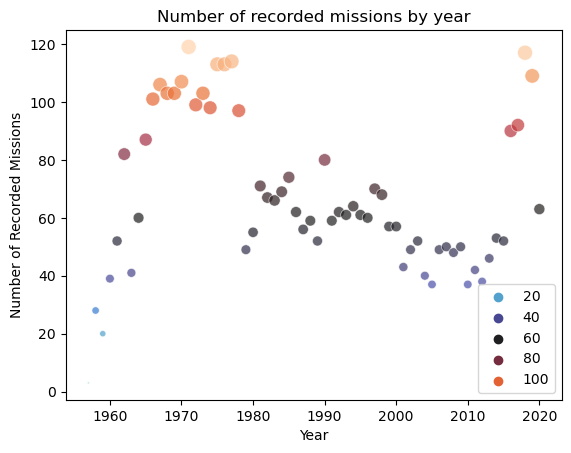

In [56]:
sns.scatterplot(yr_msn,x=yr_msn.index,
                y=yr_msn.values,
                hue=yr_msn.values,
                s=yr_msn.values,
               alpha=0.7,
               palette="icefire",)
plt.title("Number of recorded missions by year")
plt.xlabel("Year")
plt.ylabel("Number of Recorded Missions")

### Again we see proof of the period when the space race was at its peak. We saw previously how there was a lot of money being spent on missions during the 70s and 80s. 
### Here we see that the number of recorded missions also were high during that phase.

### Use a Choropleth Map to Show the Number of Launches by Country

In [57]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [58]:
df_data.sample()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
619,KARI,"LC-1, Naro Space Center, South Korea",2013-01-30 07:00:00+00:00,Naro-1 | STSAT-2C,StatusRetired,NaN,Success


#### Creating a new column called 'country' by grabbing the last string in the 'Location' column after the ','.

In [59]:
df_data["country"]=df_data["Location"].apply(lambda x : x.split(",").pop())

In [60]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


#### Counting how many countries are there and how many times they occur.

In [61]:
df_data["country"].value_counts()

 Russia                            1395
 USA                               1344
 Kazakhstan                         701
 France                             303
 China                              268
 Japan                              126
 India                               76
 Pacific Ocean                       36
 New Zealand                         13
 Iran                                13
 Israel                              11
 Kenya                                9
 Australia                            6
 North Korea                          5
 New Mexico                           4
 South Korea                          3
 Barents Sea                          3
 Brazil                               3
 Gran Canaria                         2
 Pacific Missile Range Facility       1
 Yellow Sea                           1
 Shahrud Missile Test Site            1
Name: country, dtype: int64

#### A lot of the locations mentioned are now part of a different country today. Below I try to change those locations to the appropriate country. 

In [62]:
df_data["country"]=df_data["country"].str.replace("Russia","Russian Federation")
df_data["country"]=df_data["country"].str.replace("Yellow Sea","China")
df_data["country"]=df_data["country"].str.replace("Iran","Iran, Islamic Republic of")
df_data["country"]=df_data["country"].str.replace("Shahrud Missile Test Site","Iran, Islamic Republic of")
df_data["country"]=df_data["country"].str.replace("New Mexico","United States of America")
df_data["country"]=df_data["country"].str.replace("Pacific Missile Range Facility","United States of America")
df_data["country"]=df_data["country"].str.replace("Gran Canaria","United States of America")
df_data["country"]=df_data["country"].str.replace("USA","United States of America")
df_data["country"]=df_data["country"].str.replace("Barents Sea","Russian Federation")
df_data["country"]=df_data["country"].str.replace("Pacific Ocean","United States of America")



#### Checking vakue counts on countries now and we should have fewer locations.

In [63]:
df_data["country"].value_counts()

 Russian Federation           1398
 United States of America     1387
 Kazakhstan                    701
 France                        303
 China                         269
 Japan                         126
 India                          76
 Iran, Islamic Republic of      14
 New Zealand                    13
 Israel                         11
 Kenya                           9
 Australia                       6
 North Korea                     5
 South Korea                     3
 Brazil                          3
Name: country, dtype: int64

#### Using 'strip()' to get rid of un-necessary whitespaces.

In [64]:
df_data["country"]=df_data["country"].str.strip()

In [65]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


#### Creating a blank dictionary and using the iso3166 package to assign the country name and its corresponding alpha3 format name.
#### This is important since we need the alpha3 format of the country to plot any choropleth maps. 

In [66]:
iso = {}
for c in countries:
    iso[c.name]=c.alpha3
print(iso)


{'Afghanistan': 'AFG', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Algeria': 'DZA', 'American Samoa': 'ASM', 'Andorra': 'AND', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Antarctica': 'ATA', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ABW', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahamas': 'BHS', 'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB', 'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ', 'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN', 'Bolivia, Plurinational State of': 'BOL', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Bouvet Island': 'BVT', 'Brazil': 'BRA', 'British Indian Ocean Territory': 'IOT', 'Brunei Darussalam': 'BRN', 'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burundi': 'BDI', 'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN', 'Cabo Verde': 'CPV', 'Cayman Islands': 'CYM', 'Central African Republic': 'CAF', 'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Chr

#### Updating a few ISO names fpor countries.

In [67]:
iso["North Korea"] = "PRK"

In [68]:
iso["South Korea"]="KOR"

In [69]:
iso["South Korea"]="KOR"

#### Creating this example function to check if we can grab the iso correctly from the dictionary and if it works.

In [70]:
def get_iso():
    for x in df_data["country"]:
        print(iso[x])
            
            
get_iso()

USA
CHN
USA
KAZ
USA
CHN
KAZ
CHN
USA
JPN
USA
CHN
CHN
ISR
CHN
NZL
CHN
USA
CHN
CHN
USA
NZL
CHN
USA
CHN
USA
CHN
USA
RUS
JPN
USA
CHN
CHN
KAZ
USA
IRN
CHN
KAZ
USA
CHN
KAZ
USA
RUS
CHN
CHN
USA
RUS
CHN
FRA
USA
USA
USA
IRN
JPN
KAZ
NZL
USA
USA
FRA
CHN
CHN
CHN
USA
CHN
RUS
KAZ
USA
CHN
FRA
USA
CHN
USA
IND
RUS
CHN
CHN
KAZ
NZL
USA
CHN
IND
FRA
RUS
CHN
CHN
CHN
CHN
USA
CHN
CHN
USA
USA
CHN
NZL
USA
KAZ
CHN
RUS
KAZ
CHN
JPN
CHN
CHN
CHN
CHN
RUS
IRN
USA
KAZ
NZL
CHN
CHN
USA
USA
FRA
KAZ
KAZ
RUS
CHN
USA
CHN
IND
KAZ
KAZ
FRA
RUS
RUS
USA
NZL
USA
CHN
FRA
USA
CHN
KAZ
RUS
USA
CHN
IND
CHN
NZL
USA
USA
CHN
CHN
USA
USA
FRA
KAZ
IND
CHN
NZL
CHN
FRA
USA
KAZ
CHN
USA
USA
FRA
USA
KAZ
FRA
IRN
IND
USA
CHN
USA
JPN
IRN
USA
CHN
CHN
RUS
CHN
USA
CHN
KAZ
FRA
IND
NZL
CHN
CHN
USA
FRA
USA
KAZ
RUS
IND
FRA
CHN
CHN
USA
KAZ
USA
IND
NZL
FRA
RUS
CHN
JPN
CHN
CHN
RUS
CHN
FRA
USA
CHN
KAZ
CHN
USA
CHN
FRA
JPN
CHN
IND
USA
USA
CHN
USA
CHN
FRA
USA
USA
CHN
CHN
USA
FRA
USA
USA
KAZ
CHN
CHN
USA
CHN
RUS
JPN
KAZ
CHN
USA
CHN
USA
USA
CHN
USA
CHN
USA
CHN
USA
CHN


#### Creating a new column called 'iso' with extracted iso values from country names by using the lambda function on the 'country' column.

In [114]:
df_data["iso"] = df_data["country"].apply(lambda x:iso[x])

In [115]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957


In [116]:
df_msn_cnt = df_data.groupby("iso", as_index=False)["Mission_Status"].count()

In [117]:
fig = px.choropleth(df_msn_cnt, locations="iso",
                    color="Mission_Status", 
                    hover_name="iso",
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title="Number of Missions by Country")
fig.show()

## Using a Choropleth Map to Show the Number of Failures by Country


### First lets separate out only failures 

In [118]:
df_fails = df_data[df_data["Mission_Status"]=="Failure"]
df_fails

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,year
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00+00:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,China,CHN,2020
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04 21:19:00+00:00,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,New Zealand,NZL,2020
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25 19:50:00+00:00,LauncherOne | Demo Flight,StatusActive,12.00,Failure,United States of America,USA,2020
36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09 11:46:00+00:00,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN,2020
43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16 13:34:00+00:00,Long March 7A | XJY-6,StatusActive,NaN,Failure,China,CHN,2020
...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,United States of America,USA,1958
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Kazakhstan,KAZ,1958
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,United States of America,USA,1958
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,USA,1958


In [74]:
df_fails_cnt = df_fails.groupby("iso", as_index=False)["Mission_Status"].count()

In [75]:
df_fails_cnt.rename(columns = {"Mission_Status":"Number of Failures"}, inplace=True)

In [76]:
df_fails_cnt

,iso,Number of Failures
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,IRN,8
6,ISR,2
7,JPN,10
8,KAZ,72
9,KOR,2


In [77]:
fig = px.choropleth(df_fails_cnt, locations="iso",
                    color="Number of Failures", 
                    hover_name="iso",
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title="Number of Failures by Country")
fig.show()

### Creating a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [78]:
fig = px.sunburst(df_data,
path=['country', 'Organisation', 'Mission_Status']
                 )

fig.show()

### Analysing the Total Amount of Money Spent by Organisation on Space Missions

In [79]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,USA


In [80]:
df_org_exp= df_data.groupby("Organisation",as_index=False).sum("Price").sort_values("Price",ascending=False)
df_org_exp

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


### Looks like NASA tops the chart with expenditure overall. We see there are a lot of zero values. It is a better idea to get rid of them in order to plot averages etc accurately.

In [81]:
df_org_exp_cln = df_org_exp[df_org_exp["Price"]>0]
df_org_exp_cln

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


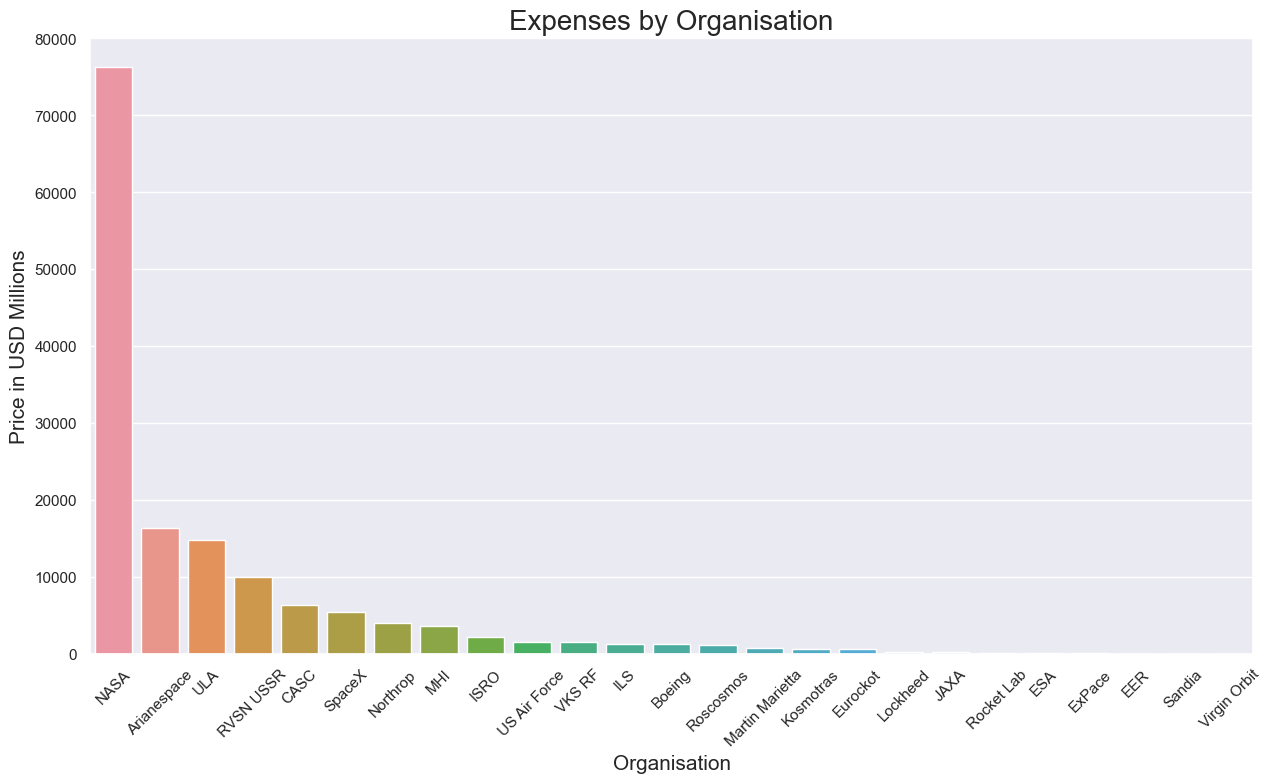

In [82]:
sns.set(rc = {'figure.figsize':(15, 8)})

sns.barplot(df_org_exp_cln,x="Organisation",y="Price")
plt.xticks(rotation=45)
plt.title("Expenses by Organisation",fontsize=20)
plt.ylabel("Price in USD Millions",fontsize=15)
plt.xlabel("Organisation",fontsize=15)

plt.show()

## Analysing the Amount of Money Spent by Organisation per Launch

In [83]:
df_org_avg_exp= df_data.groupby("Organisation",as_index=False).mean("Price").sort_values("Price", ascending=False)
df_org_avg_exp

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


#### Getting rid of all NaN values.

In [84]:
df_org_avg_exp=df_org_avg_exp.dropna()

In [85]:
df_org_avg_exp=df_org_avg_exp.drop(index=40)

In [86]:
df_org_avg_exp

,Organisation,Price
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00
46,SpaceX,54.99


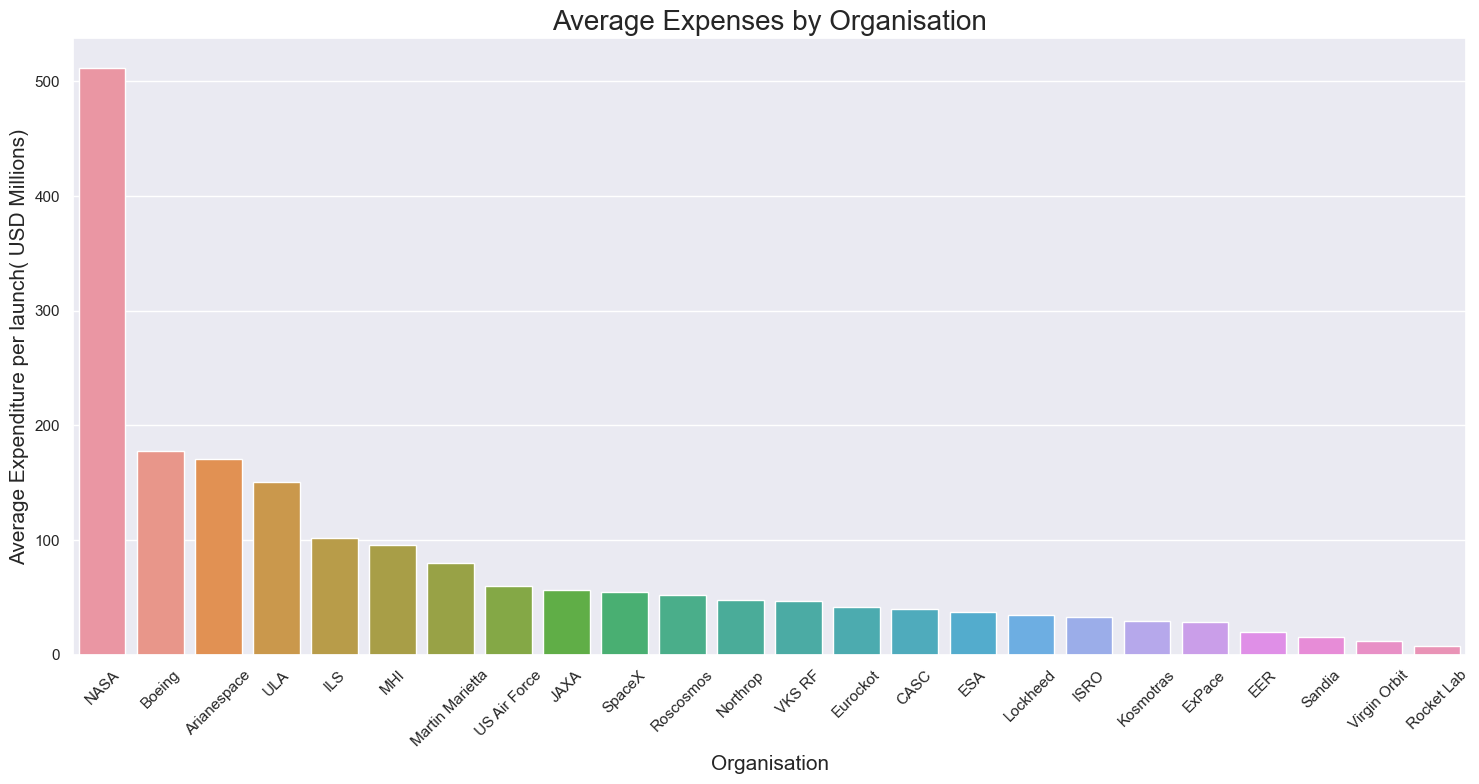

In [87]:
sns.set(rc = {'figure.figsize':(15, 8)})

sns.barplot(df_org_avg_exp,x="Organisation",y="Price")
plt.xticks(rotation=45)
plt.title("Average Expenses by Organisation",fontsize=20)
plt.ylabel("Average Expenditure per launch( USD Millions)",fontsize=15)
plt.xlabel("Organisation",fontsize=15)
plt.tight_layout()
plt.show()

### Charting the Number of Launches by month.

Which month has seen the highest number of launches in all time?

In [88]:
df_data_month = df_data[["Date","Mission_Status"]]

In [89]:
df_data_month["month"] = df_data_month["Date"].apply(lambda x:x.month)

In [90]:
df_data_month

,Date,Mission_Status,month
0,2020-08-07 05:12:00+00:00,Success,8
1,2020-08-06 04:01:00+00:00,Success,8
2,2020-08-04 23:57:00+00:00,Success,8
3,2020-07-30 21:25:00+00:00,Success,7
4,2020-07-30 11:50:00+00:00,Success,7
...,...,...,...
4319,1958-02-05 07:33:00+00:00,Failure,2
4320,1958-02-01 03:48:00+00:00,Success,2
4321,1957-12-06 16:44:00+00:00,Failure,12
4322,1957-11-03 02:30:00+00:00,Success,11


In [91]:
df_mon_cnt = df_data_month.groupby("month",as_index=False)["Mission_Status"].count()

In [92]:
df_mon_cnt

,month,Mission_Status
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


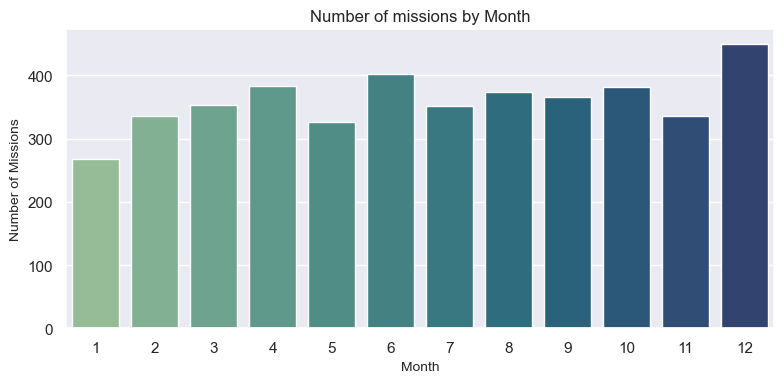

In [93]:
sns.set(rc = {'figure.figsize':(8, 4)})
sns.barplot(df_mon_cnt,x="month",y="Mission_Status",palette="crest")
plt.ylabel("Number of Missions",fontsize=10)
plt.xlabel("Month",fontsize =10)
plt.title("Number of missions by Month")
plt.tight_layout()

### Charting the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [94]:
df_data.groupby("Organisation")["Organisation"].count().sort_values(ascending=False).head(10)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

In [95]:
df_data["year"] = df_data["Date"].apply(lambda x:x.year)

In [96]:

ds = df_data.groupby(['year', 'Organisation'])['Mission_Status'].count().reset_index().sort_values(['year', 'Mission_Status'], ascending=False)
ds = pd.concat([group[1].head(1) for group in ds.groupby(['year'])])
ds.columns = ['year', 'Organisation', 'launches']

fig = px.scatter(
    ds, 
    x="year", 
    y="launches", 
    color='Organisation', 
    size="launches",
    title='Leaders by launches for every year (Organisation)',
    width=800
)


fig.show()

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_99331/87590229.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



### Space missions have gone down significantly over time. The 70s and 80s saw Russia clearly spending a lot and launching alot of space missions. However over time, the number of launches has gone down and so has the type of organisations. 
#### Private companies like SpaceX and countries like China have been the recent leader in terms of launches every year.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [97]:
df_us_rus = df_data[(df_data["iso"]=="USA") | (df_data["iso"]=="RUS")]

In [98]:
df_us_rus

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,USA,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,USA,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,USA,2020
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,United States of America,USA,2020
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA",2020-07-15 13:46:00+00:00,Minotaur IV | NROL-129,StatusActive,46.00,Success,United States of America,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,United States of America,USA,1958
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,United States of America,USA,1958
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America,USA,1958


In [99]:
df_us_rus=df_us_rus[df_us_rus["year"]<1991]

In [100]:
dfusruspie = df_us_rus.groupby("country")["Mission_Status"].count()

In [101]:
colors = sns.color_palette('pastel')[0:5]
px.pie(dfusruspie,
       names = dfusruspie.index,
       values=dfusruspie.values,
      labels=dfusruspie.index,
      title="USA VS USSR Missions during Cold War")

/Users/sunny/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### Charting the Total Number of Mission Failures Year on Year.

In [102]:
df_fails = df_data[(df_data["Mission_Status"]=="Failure") | (df_data["Mission_Status"]=="Partial Failure")]

In [103]:
df_fails_yr = df_fails.groupby("year",as_index=False)["Mission_Status"].count()

In [104]:
df_fails_yr

,year,Mission_Status
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,3
60,2017,8
61,2018,4
62,2019,8


In [105]:
px.bar(df_fails_yr,
       x="year",
       y="Mission_Status",
       color="Mission_Status",
       labels={"year":"Year","Mission_Status":"Number of Failures"},
      title="Number of Failures each year")

### We see a significant drop in the number of failures. This can be due to years of learning, lessons learnt from past failures,advancement of technology in space aeronautics and careful and considerate utilization of money on space missions.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [106]:
df_yr_cnt = df_data.groupby(["year","country"]).count().sort_values("Mission_Status").groupby(level=0).tail(1)

In [107]:
df_yr_cnt=df_yr_cnt.sort_values("year").reset_index()

In [108]:
px.bar(df_yr_cnt,
       x="year",
       y="Mission_Status",
       labels={"year":"Year","Mission_Status":"Number of Missions"},
       title = "Countries with Most Launches every year",
       color="country")

### While Russia was a clear leader in terms on most number of launches during the 70s and 80s, USA dominated thereafter. Recently, we see China be a clear leader in terms of launches since 2018.